In [ ]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw, ImageFilter
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimage
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

/usr/lib/python3.10/importlib/__init__.py:126: UserWarning: viewer requires Qt
  return _bootstrap._gcd_import(name[level:], package, level)


In [ ]:
import cv2

img = cv2.imread("/content/frame0001.jpg") # Read image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
t_lower = 10  # Lower Threshold
t_upper = 100  # Upper threshold
aux = np.ones((3, 3), dtype='uint8')
# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper)
imshow(edge), show()

In [ ]:
#mask_ero = cv2.erode(edge, aux, iterations=1)
mask_dil = cv2.dilate(edge, aux, iterations=20)
final_mask = cv2.bitwise_and(edge, edge, mask=mask_dil)
final_mask = cv2.dilate(final_mask, aux, iterations=4)
imshow(final_mask), show()

# AED 1

[65536.0, 98304.0, 131072.0, 163840.0, 196608.0, 229376.0, 262144.0, 294912.0, 327680.0, 360448.0, 393216.0, 425984.0, 458752.0, 491520.0, 524288.0]


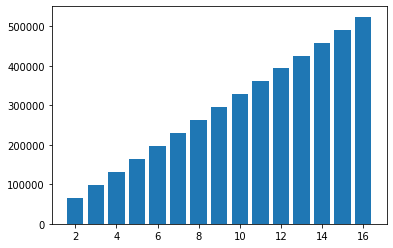

In [ ]:
#1-A
def calcular_armazenamento() -> None:
    #armazenar o tamanho da matriz
    tam = 512*512
    x, y = [], []
    for i in range(2, 17):
        #quantidade de bits
        x.append(i)
        #resultado atual
        y.append(tam*i/8)


    print(y)
    #plot do grafico
    plt.bar(x, y)
    plt.show()

calcular_armazenamento()

In [ ]:
#2-B
from math import sqrt

def calcular_raizes(a, b, c) -> list:
    delta = b * b - 4 * a * c
    if delta < 0:
        return []
    x1 = (-b + sqrt(delta))/(2*a)
    x2 = (-b + sqrt(delta))/(2*a)
    return [x1, x2]

In [ ]:
#3-C
#funcao de calculo do fatorial iterativo
def calcular_fatorial_iterativo(n):
    ans = 1
    for i in range(2, n+1):
        ans *= i
    return ans

#funcao do calculo do fatorial recursivo
def calcular_fatorial_recursivo(n):
    if n == 1:
        return n
    return n * calcular_fatorial_recursivo(n-1)

In [ ]:
#4-D
matriz = [[7.5, 8.0, 9.0],
          [6.7, 7.7, 5.4],
          [8.0, 9.2, 7.4],
          [6.6, 6.6, 6.6],
          [5.0, 8.0, 7.0]]
media_alunos = [sum(matriz[i])/3 for i in range(4)]
print(f'media dos alunos: {media_alunos}')
for i in range(5):
  media = 0.4*matriz[i][0] + 0.4*matriz[i][1] + 0.2*matriz[i][2]
  print(f'media do aluno {i+1} = {media}')

for i in range(3):
  {
    soma = 0
  for j in range(5):
    {
        soma += matriz[j][i]
    }
      print(f'soma prova {i+1} = {soma/5}')
  }

media dos alunos: [8.166666666666666, 6.6000000000000005, 8.200000000000001, 6.599999999999999]
media do aluno 1 = 8.0
media do aluno 2 = 6.84
media do aluno 3 = 8.36
media do aluno 4 = 6.6000000000000005
media do aluno 5 = 6.6000000000000005
soma prova 1 = 6.76
soma prova 2 = 7.9
soma prova 3 = 7.08


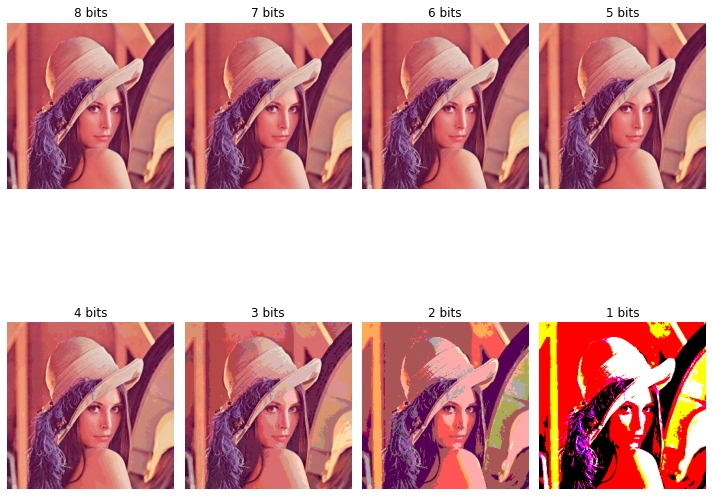

In [ ]:
#Ler a imagem
im = imread('lena_cor.bmp')
l, c = 0, 0
#Criar subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
#plot da imagem com 8 bits
axs[l][c].imshow(im), axs[l][c].axis('off')
axs[l][c].set_title('8 bits')
n, m = im.shape[:2]
for k in range(7, 0, -1):
  c = (c+1)%4
  if k == 4:
    l += 1
  new_im = np.ndarray((n, m, 3), dtype='uint8')
  for i in range(n):
    for j in range(m):
      #Calcular a quantizacao
      tempr = round(((2**k-1)/255)*im[i][j][0])
      tempg = round(((2**k-1)/255)*im[i][j][1])
      tempb = round(((2**k-1)/255)*im[i][j][2])
      #Normalizar os valores
      r = 255/(2**k-1) * tempr
      g = 255/(2**k-1) * tempg
      b = 255/(2**k-1) * tempb
      #atribuir os valores a nova imagem
      new_im[i][j] = [r, g, b]
  #adicionar nova imagem aos subplots
  axs[l][c].imshow(new_im), axs[l][c].axis('off')
  axs[l][c].set_title(f'{k} bits')
plt.tight_layout()
plt.show()

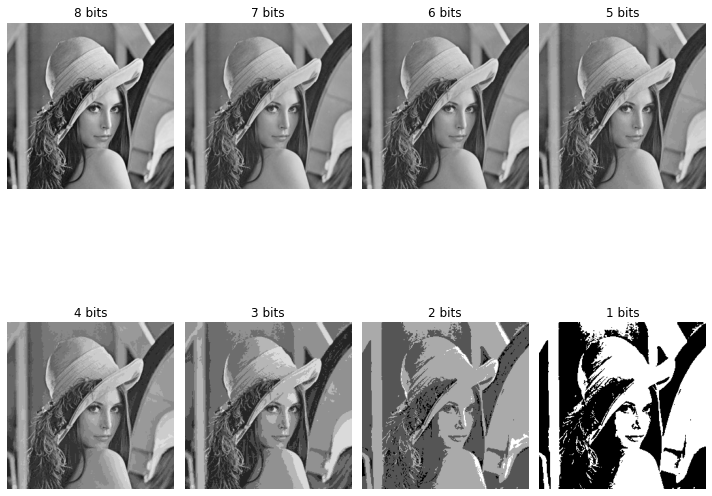

In [ ]:
#Ler a imagem
im = imread('lena_gray.bmp')
l, c = 0, 0
#Criar subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
#plot da imagem com 8 bits
axs[l][c].imshow(im, cmap='gray'), axs[l][c].axis('off')
axs[l][c].set_title('8 bits')
n, m = im.shape
mx = im.max()
for k in range(7, 0, -1):
  c = (c+1)%4
  if k == 4:
    l += 1
  new_im = np.ndarray((n, m, 3), dtype='uint8')
  for i in range(n):
    for j in range(m):
      #Calcular a quantizacao
      temp = round(((2**k-1)/255)*im[i][j])
      #Normalizar os valores
      new_im[i][j] = 255/(2**k-1) * temp
  #adicionar nova imagem aos subplots
  axs[l][c].imshow(new_im, cmap='gray'), axs[l][c].axis('off')
  axs[l][c].set_title(f'{k} bits')
plt.tight_layout()
plt.show()

# Atividade

In [ ]:
im_noise = imread('ruidosalpimenta.png')
n, m = im_noise.shape
new_im = np.zeros((n, m))
for i in range(1, n-1):
  for j in range(1, m-1):
    temp = np.median(im[i-1:i+1][j-1:j+1])

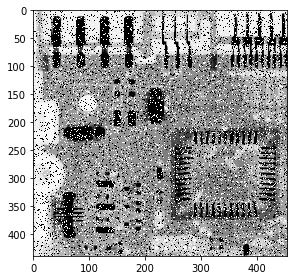

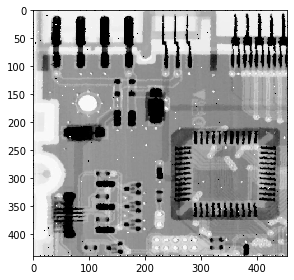

(<matplotlib.image.AxesImage at 0x7fd638a8fed0>, None)

In [ ]:
im_noise = imread('ruidosalpimenta.png')
n, m = im_noise.shape
new_im = im_noise.copy()
for i in range(1, n-1):
  for j in range(1, m-1):
    if(im_noise[i, j])
    temp = np.median([im_noise[i-1][j-1:j+2], im_noise[i][j-1:j+2], im_noise[i+1][j-1:j+2]])
    new_im[i][j] = temp

imshow(im_noise, cmap='gray'), show()
imshow(new_im, cmap='gray'), show()

In [ ]:
print([im_noise[i-1][j-1:j+2], im_noise[i][j-1:j+2], im_noise[i+1][j-1:j+2]])
print(np.median([im_noise[i-1][j-1:j+2], im_noise[i][j-1:j+2], im_noise[i+1][j-1:j+2]]))


[array([156, 150, 165], dtype=uint8), array([157, 149, 165], dtype=uint8), array([161, 150, 162], dtype=uint8)]
157.0


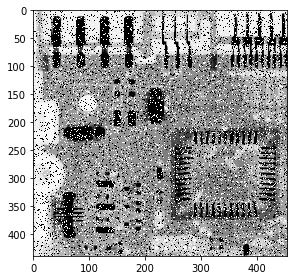

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


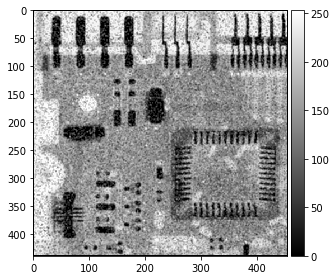

(<matplotlib.image.AxesImage at 0x7fd638b04090>, None)

In [ ]:
im_noise = imread('ruidosalpimenta.png')
n, m = im_noise.shape
new_im = np.zeros((n, m))
mask = 1/9 * np.ones((3, 3))
for i in range(1, n-1):
  for j in range(1, m-1):
    temp = [im_noise[i-1][j-1:j+2], im_noise[i][j-1:j+2], im_noise[i+1][j-1:j+2]]*mask
    new_im[i][j] = sum(temp.reshape(9,1))

imshow(im_noise, cmap='gray'), show()
imshow(new_im, cmap='gray'), show()

In [ ]:
temp

array([[17.33333333, 16.66666667, 18.33333333],
       [17.44444444, 16.55555556, 18.33333333],
       [17.88888889, 16.66666667, 18.        ]])

# Aula 1

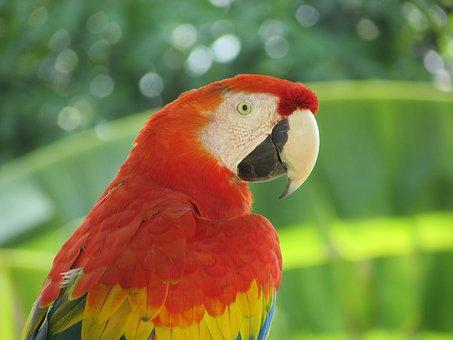

In [ ]:
im = Image.open(".\imagens\parrot.jpg")

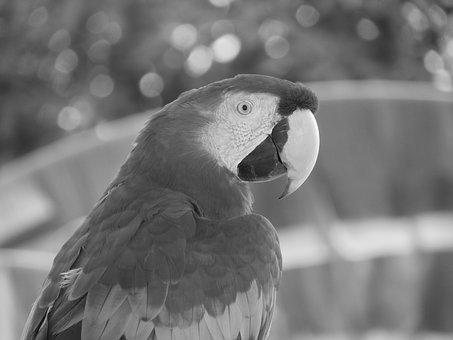

In [ ]:
im_gray = im.convert('L')
im_gray

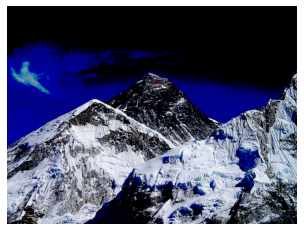

In [ ]:
im1 = mpimage.imread(".\imagens\hill.png")
im2 = im1
im2[im2 < 0.5] = 0
showImage(im2)

In [ ]:
rgb_img = imread(".\imagens\parrot.png")[:,:,:3]
#hsv -> hue, saturation, value
#hsl -> hue, saturation, lightness
hsv_img = color.rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]      #ângulo na roda de cores
sat_img = hsv_img[:, :, 1]      #porcentagem de uso da cor
value_img = hsv_img[:, :, 2]    #misturas de branco e preto

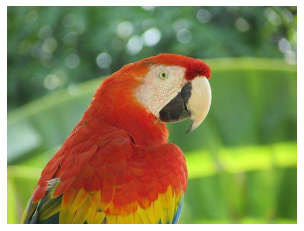

In [ ]:
showImage(rgb_img)

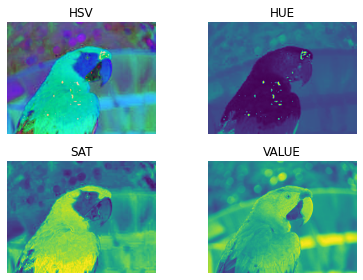

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(hsv_img)
axs[0, 0].set_title("HSV")
axs[0, 0].axis('off')
axs[0, 1].imshow(hue_img)
axs[0, 1].set_title("HUE")
axs[0, 1].axis('off')
axs[1, 0].imshow(sat_img)
axs[1, 0].set_title("SAT")
axs[1, 0].axis('off')
axs[1, 1].imshow(value_img)
axs[1, 1].set_title("VALUE")
axs[1, 1].axis('off')
fig.tight_layout()

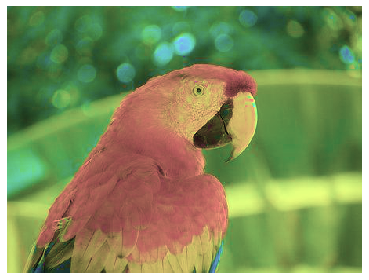

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x2103b74c8e0>, None)

In [ ]:
hsv_img[:, :, 1] = 0.5
sat_rgb_img = color.hsv2rgb(hsv_img)
plt.axis('off'), imshow(sat_rgb_img), show()

# Operações aritméticas

In [ ]:
im = imread("imagens\einstein.jpg")

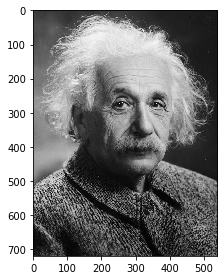

(<matplotlib.image.AxesImage at 0x1a0beff61c0>, None)

In [ ]:
n = im.shape[0]
m = im.shape[1]
im2 = im.copy()
for i in range(0, n):
    for j in range(0, m):
        if (im2[i][j] + 75 > 255):
            im2[i][j] = 255
        else:
            im2[i][j] += 75
im3 = im.copy()
for i in range(0, n):
    for j in range(0, m):
        if (im3[i][j] - 75 < 0):
            im3[i][j] = 0
        else:
            im3[i][j] -= 75

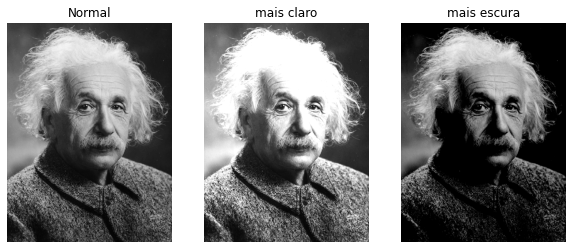

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 10))
axs[0].imshow(im, cmap=plt.cm.gray)
axs[0].set_title("Normal")
axs[0].axis('off')
axs[1].imshow(im2, cmap=plt.cm.gray)
axs[1].set_title("mais claro")
axs[1].axis('off')
axs[2].imshow(im3, cmap=plt.cm.gray)
axs[2].set_title("mais escura")
axs[2].axis('off')
plt.show()

# Aleatoriedade

In [ ]:
im = cv2.imread('frame0003.jpg')

In [ ]:
im1 = imread('frame0002.jpg')
im2 = imread('frame0003.jpg')
#Converter pra hsv pra melhorar a identificação
hsv_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2HSV)
hsv_im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV)
mask = np.zeros((n, m), dtype='uint8')

for i in range(n):
    for j in range(m):
        if (abs(int(hsv_im1[i][j][2]) - int(hsv_im2[i][j][2])) > 0.30*int(hsv_im1[i][j][2])):
            mask[i][j] = 255

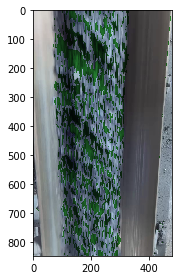

(<matplotlib.image.AxesImage at 0x7f3e4be164d0>, None)

In [ ]:
result = im.copy()
for c in range(n):
    for l in range(m):
        if mask[c][l]:
            result[c][l][1] = result[c][l][1] * 0.6
            result[c][l][0] = result[c][l][0] * 0.2
            result[c][l][2] = result[c][l][2] * 0.2
imshow(result), show()

In [ ]:
mask_teste = mask
aux = np.ones((3, 3), dtype='uint8')

In [ ]:
mask_ero = cv2.erode(mask_teste, aux, iterations=2)
mask_dil = cv2.dilate(mask_ero, aux, iterations=20)
final_mask = cv2.bitwise_and(mask, mask, mask=mask_dil)
final_mask = cv2.dilate(final_mask, aux, iterations=4)

In [ ]:
result = cv2.bitwise_and(im, im, mask=final_mask)

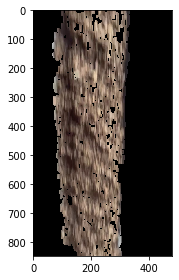

(<matplotlib.image.AxesImage at 0x7f3e4c6a9150>, None)

In [ ]:
imshow(result), show()

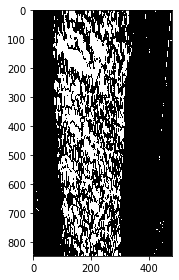

(<matplotlib.image.AxesImage at 0x7f3e4da3d690>, None)

In [ ]:
imshow(mask), show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2

In [ ]:
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
pixel_colors = rgb_im.reshape((np.shape(rgb_im)[0]*np.shape(rgb_im)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [ ]:
def plot_hsv(im):
  h, s, v = cv2.split(im)
  fig = plt.figure(figsize=(10, 10))
  axis = fig.add_subplot(1, 1, 1, projection="3d")

  axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
  axis.set_xlabel("Hue")
  axis.set_ylabel("Saturation")
  axis.set_zlabel("Value")
  plt.show()

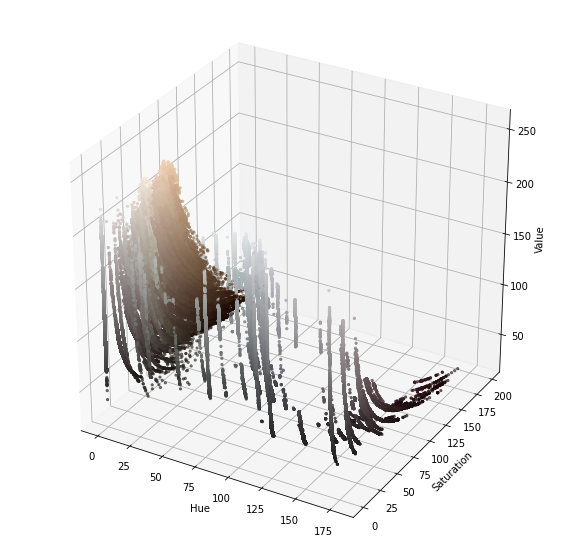

In [ ]:
plot_hsv(hsv_im)

In [ ]:
hsv_im

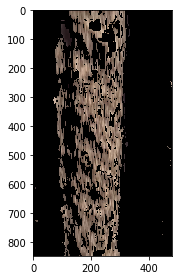

(<matplotlib.image.AxesImage at 0x7f8b19371150>, None)

In [ ]:
mn, mx = np.array([1, 50, 100]), np.array([14, 255, 215])
mn2, mx2 = np.array([100, 40, 1]), np.array([175, 225, 75])
im = cv2.imread('frame0003.jpg')
hsv_im  = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(hsv_im, mn, mx)
mask2 = cv2.inRange(hsv_im, mn2, mx2)
mask = mask1 + mask2
target = cv2.bitwise_and(rgb_im, rgb_im, mask=mask)
imshow(target), show()

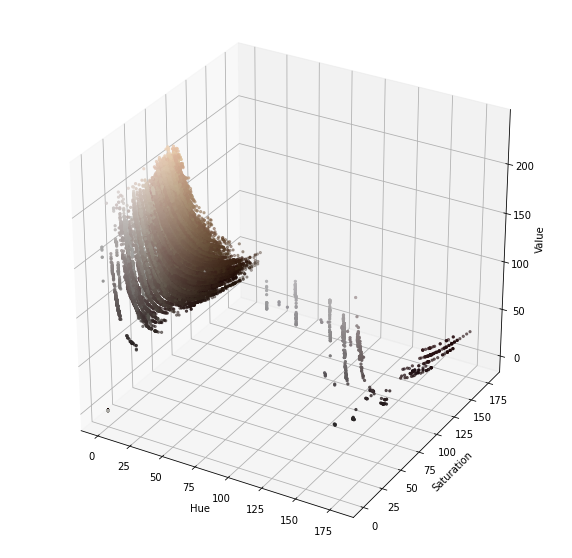

In [ ]:
target_hsv = cv2.cvtColor(target, cv2.COLOR_RGB2HSV)
plot_hsv(target_hsv)

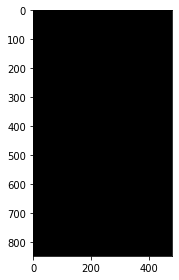

(<matplotlib.image.AxesImage at 0x7feae497cb50>, None)

In [ ]:
mn, mx = np.array([25, 100, 1]), np.array([125, 255, 150])
im = target
hsv_im  = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv_im, mn, mx)
result = cv2.bitwise_and(rgb_im, rgb_im, mask=mask)
imshow(result), show()

In [ ]:
hsv_im

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


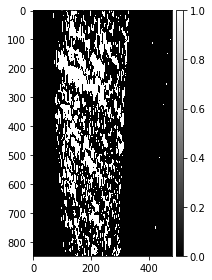

(<matplotlib.image.AxesImage at 0x7feadee4d7d0>, None)

In [ ]:
im1 = imread('frame0001.jpg')
im2 = imread('frame0002.jpg')
#Converter pra hsv pra melhorar a identificação
hsv_im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2HSV)
hsv_im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV)
mask = np.zeros((n, m), dtype='uint8')
a = set()
for i in range(n):
  for j in range(m):
      if (abs(int(hsv_im1[i][j][2]) - int(hsv_im2[i][j][2])) > 0.35*int(hsv_im1[i][j][2])):
          mask[i][j] = 1
          a.add(tuple(hsv_im1[i][j]))
target = cv2.bitwise_and(im1, im1, mask=mask)
imshow(mask, cmap='gray'), show()

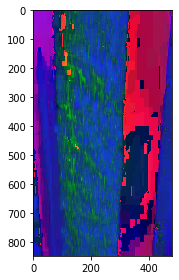

(<matplotlib.image.AxesImage at 0x7f5505d13350>, None)

In [ ]:
rgb_img = imread("frame1.jpg")[:,:,:3]
#hsv -> hue, saturation, value
#hsl -> hue, saturation, lightness
hsv_img = color.rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]      #ângulo na roda de cores
sat_img = hsv_img[:, :, 1]      #porcentagem de uso da cor
value_img = hsv_img[:, :, 2]    #misturas de branco e preto
imshow(hsv_img), show()

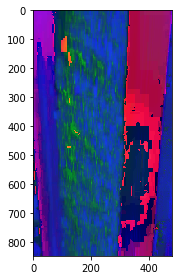

(<matplotlib.image.AxesImage at 0x7f54fd0d1b50>, None)

In [ ]:
rgb_img = imread("frame2.jpg")[:,:,:3]
#hsv -> hue, saturation, value
#hsl -> hue, saturation, lightness
hsv_img = color.rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]      #ângulo na roda de cores
sat_img = hsv_img[:, :, 1]      #porcentagem de uso da cor
value_img = hsv_img[:, :, 2]    #misturas de branco e preto
imshow(hsv_img), show()

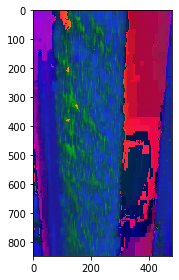

(<matplotlib.image.AxesImage at 0x7f550581a310>, None)

In [ ]:
rgb_img = imread("frame3.jpg")[:,:,:3]
#hsv -> hue, saturation, value
#hsl -> hue, saturation, lightness
hsv_img = color.rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]      #ângulo na roda de cores
sat_img = hsv_img[:, :, 1]      #porcentagem de uso da cor
value_img = hsv_img[:, :, 2]    #misturas de branco e preto
imshow(hsv_img), show()

In [ ]:
hsv_img[0][0]

array([0.57142857, 0.03167421, 0.86666667])

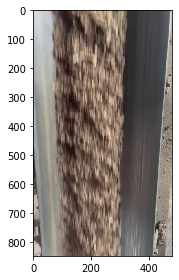

(<matplotlib.image.AxesImage at 0x7f5505c807d0>, None)

In [ ]:
rgb_img = imread("frame3.jpg")
imshow(rgb_img), show()

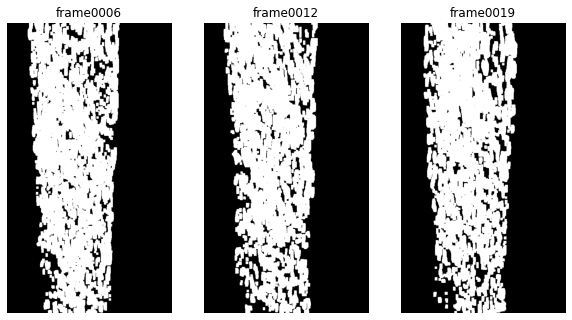

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
im = imread('frame0006.jpg')
ax1.imshow(im, cmap='gray')
ax1.axis('off')
ax1.set_title('frame0006')
im = imread('frame0012.jpg')
ax2.imshow(im, cmap='gray')
ax2.axis('off')
ax2.set_title('frame0012')
im = imread('frame0019.jpg')
ax3.imshow(im, cmap='gray')
ax3.axis('off')
ax3.set_title('frame0019')
plt.show()

(4000, 2992, 3)


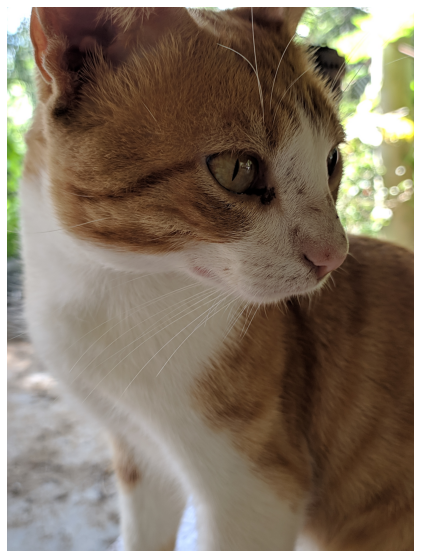

In [ ]:
im = mpimage.imread("imagens\gato.png")
print(im.shape)
fig, axs = plt.subplots(ncols=1, figsize=(10, 10))
axs.imshow(im)
axs.axis('off')
plt.show()

In [ ]:
def make_shadows(im, side = False):
    cols = im.shape[1]
    if side:
        grad = np.linspace(1, 0, cols)
    else:
        grad = np.linspace(0, 1, cols)
    grad = np.dstack((grad, grad, grad))
    ans = im * grad
    return ans

In [ ]:
a = make_shadows(im)

(4000, 2992, 3) (1, 2992, 3)


In [ ]:
def make_shadows_hor(im, side=False):
    rows = im.shape[0]
    if side:
        grad = np.linspace(1, 0, rows)
    else:
        grad = np.linspace(0, 1, rows)
    grad = np.vstack((grad, grad, grad)).transpose()
    grad = grad[:, np.newaxis]
    ans = im * grad
    return ans

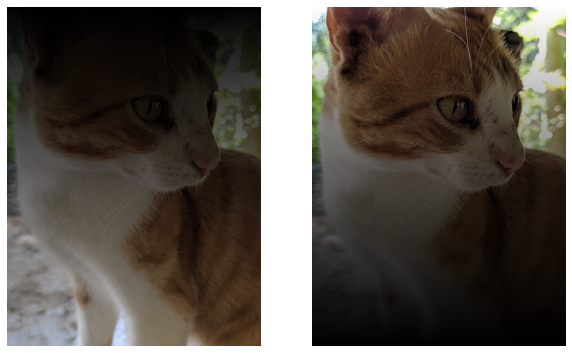

In [ ]:
up_shadow_im, down_shadow_im = make_shadows_hor(im), make_shadows_hor(im, True)
fig, axs = plt.subplots(ncols=2, figsize=(10, 10))
axs[0].imshow(up_shadow_im)
axs[0].axis('off')
axs[1].imshow(down_shadow_im)
axs[1].axis('off')
plt.show()

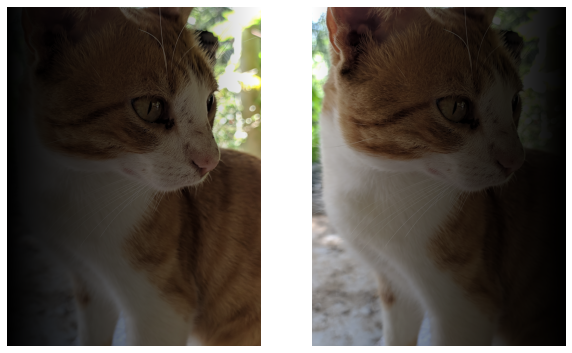

In [ ]:
left_shadow_im, right_shadow_im = make_shadows(im), make_shadows(im, True)
fig, axs = plt.subplots(ncols=2, figsize=(10, 10))
axs[0].imshow(left_shadow_im)
axs[0].axis('off')
axs[1].imshow(right_shadow_im)
axs[1].axis('off')
plt.show()

In [ ]:
def rot_90(im, qnt = 1):
    for _ in range(qnt):
        n = im.shape[0]
        m = im.shape[1]
        new_im = np.ndarray((m, n, im.shape[2]))
        for i in range(n):
            for j in range(m):
                new_im[j][i] = im[i][m-j-1]
        im = new_im.copy()
    return new_im

In [ ]:
type(im)

numpy.ndarray

<function matplotlib.pyplot.show(close=None, block=None)>

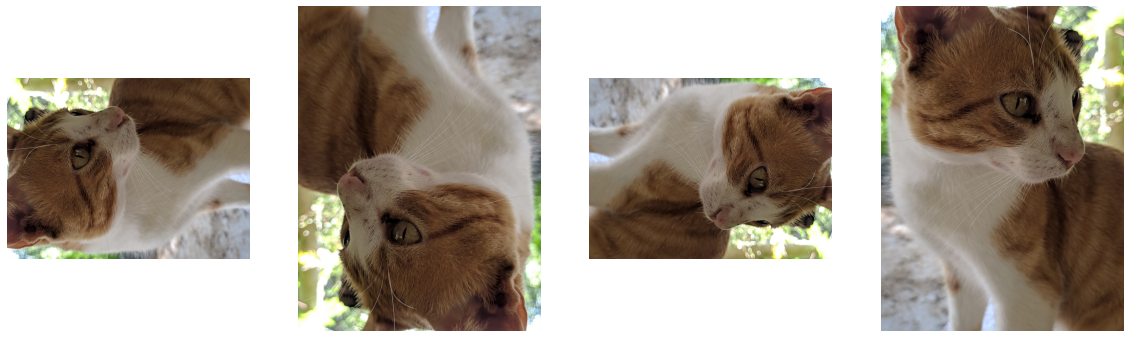

In [ ]:
rot = [rot_90(im.copy(), i) for i in range(1, 5)]
fig, axs = plt.subplots(ncols=4, figsize=(20, 10))
for i in range(4):
    axs[i].imshow(rot[i])
    axs[i].axis('off')
plt.show

# Histograma


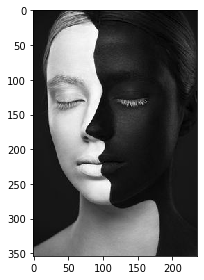

(<matplotlib.image.AxesImage at 0x7f85e76890d0>, None)

In [ ]:
im = imread('img.jpg')
imshow(im), show()

In [ ]:
im = color.rgb2gray(im)

# Atividade 19/9

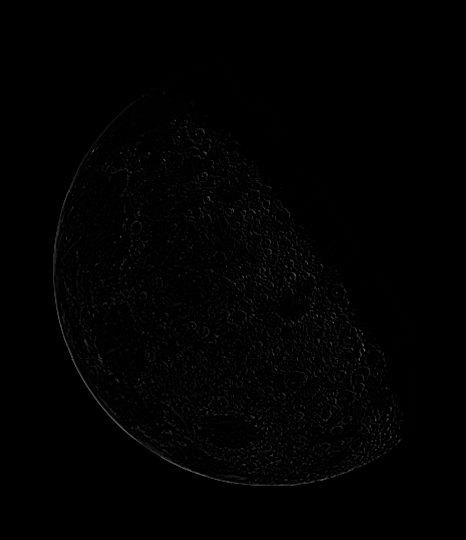

In [ ]:
im_noise = Image.open('blurry_moon.tif')
mask = [0, -1, 0, -1, 4, -1, 0, -1, 0]
mask2 = [-1, -1, -1, -1, 8, -1, -1, -1, -1]

kernel = ImageFilter.Kernel((3, 3), mask, 1)
img_filter1 = im_noise.filter(kernel)

img_filter1

(540, 466)